<a href="https://colab.research.google.com/github/Rokon-Uz-Zaman/Ecommerce-Products-Classification/blob/main/ecommerce_products_image_classification_rokon.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))



/kaggle/input/fashionmnist/t10k-labels-idx1-ubyte
/kaggle/input/fashionmnist/t10k-images-idx3-ubyte
/kaggle/input/fashionmnist/fashion-mnist_test.csv
/kaggle/input/fashionmnist/fashion-mnist_train.csv
/kaggle/input/fashionmnist/train-labels-idx1-ubyte
/kaggle/input/fashionmnist/train-images-idx3-ubyte


In [ ]:
df=pd.read_csv('../input/fashionmnist/fashion-mnist_train.csv')

In [ ]:
df.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,6,0,0,0,0,0,0,0,5,0,...,0,0,0,30,43,0,0,0,0,0
3,0,0,0,0,1,2,0,0,0,0,...,3,0,0,0,0,1,0,0,0,0
4,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
import matplotlib.pyplot as plt 



In [ ]:
ytrain=df.label

In [ ]:
ytrain.head()

0    2
1    9
2    6
3    0
4    3
Name: label, dtype: int64

In [ ]:
ytrain.shape

(60000,)

In [ ]:
xtrain=df.drop(['label'],axis=1)
xtrain.head()

,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,5,0,0,...,0,0,0,30,43,0,0,0,0,0
3,0,0,0,1,2,0,0,0,0,0,...,3,0,0,0,0,1,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
xtrain=np.array(xtrain)
xtrain=xtrain.reshape(len(xtrain),28*28)

In [ ]:
#normalize 
xtrain=xtrain/255

In [ ]:
xtrain.shape

(60000, 784)

In [ ]:
import tensorflow as tf
from tensorflow import keras


In [ ]:
#ANN 
model=keras.Sequential()
model.add(keras.layers.Dense(10,input_shape=(784,),activation ='sigmoid'))



User settings:

   KMP_AFFINITY=granularity=fine,verbose,compact,1,0
   KMP_BLOCKTIME=0
   KMP_SETTINGS=1
   KMP_WARNINGS=0

Effective settings:

   KMP_ABORT_DELAY=0
   KMP_ADAPTIVE_LOCK_PROPS='1,1024'
   KMP_ALIGN_ALLOC=64
   KMP_ALL_THREADPRIVATE=128
   KMP_ATOMIC_MODE=2
   KMP_BLOCKTIME=0
   KMP_CPUINFO_FILE: value is not defined
   KMP_DETERMINISTIC_REDUCTION=false
   KMP_DEVICE_THREAD_LIMIT=2147483647
   KMP_DISP_NUM_BUFFERS=7
   KMP_DUPLICATE_LIB_OK=false
   KMP_ENABLE_TASK_THROTTLING=true
   KMP_FORCE_REDUCTION: value is not defined
   KMP_FOREIGN_THREADS_THREADPRIVATE=true
   KMP_FORKJOIN_BARRIER='2,2'
   KMP_FORKJOIN_BARRIER_PATTERN='hyper,hyper'
   KMP_GTID_MODE=3
   KMP_HANDLE_SIGNALS=false
   KMP_HOT_TEAMS_MAX_LEVEL=1
   KMP_HOT_TEAMS_MODE=0
   KMP_INIT_AT_FORK=true
   KMP_LIBRARY=throughput
   KMP_LOCK_KIND=queuing
   KMP_MALLOC_POOL_INCR=1M
   KMP_NUM_LOCKS_IN_BLOCK=1
   KMP_PLAIN_BARRIER='2,2'
   KMP_PLAIN_BARRIER_PATTERN='hyper,hyper'
   KMP_REDUCTION_BARRIER='1,1'
  

In [ ]:
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [ ]:
model.fit(xtrain,ytrain,epochs=10)

2021-10-15 09:49:00.573021: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


Epoch 1/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.6051 - accuracy: 0.7951
Epoch 2/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.4663 - accuracy: 0.8410
Epoch 3/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.4387 - accuracy: 0.8477
Epoch 4/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.4258 - accuracy: 0.8537
Epoch 5/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.4167 - accuracy: 0.8546
Epoch 6/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.4096 - accuracy: 0.8580
Epoch 7/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.4049 - accuracy: 0.8596
Epoch 8/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.4022 - accuracy: 0.8600
Epoch 9/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3981 - accuracy: 0.8611
Epoch 10/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.395

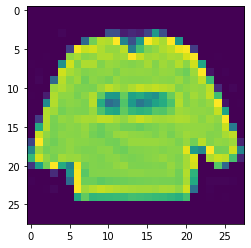

In [ ]:
plt.imshow(xtrain[0].reshape((28,28)))
plt.show()

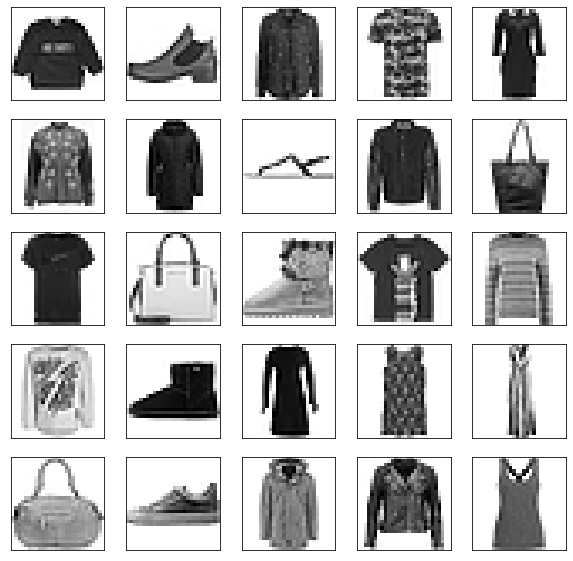

In [ ]:
#Clkd
plt.figure(figsize=(10, 10))
for i in range(25):
    plt.subplot(5, 5, i + 1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(xtrain[i].reshape((28,28)), cmap=plt.cm.binary)
    #label_index = int(y_train[i])
    #plt.title(class_names[label_index])
plt.show()